In [1]:
%cd ..

/home/caleb/Documents/GitHub/PayneLab/ProteinComplexes


In [2]:
%run Analysis_Functions.ipynb

In [3]:
%run Plotting_Functions.ipynb

### The Proteasome

### Proteasomal Proteins
Perform t-tests on tumor vs normal protein expression for the proteins within the proteasomal complexes

In [4]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

proteasome_proteins = subunitNames['PA700 complex'] + subunitNames['26S proteasome'] + subunitNames['20S proteasome'] + subunitNames['PA28-20S proteasome'] + subunitNames['PA700-20S-PA28 complex'] + subunitNames['PA28gamma-20S proteasome']
sig_proteasome = []
# Remove duplicates
proteasome_proteins = list(set(proteasome_proteins))
# Bonferroni correction of the p-value
alpha = 0.05 / len(proteasome_proteins)
# Perform t-tests
for protein in proteasome_proteins:
    pval = ttest_proteomics(protein, cancer_type = 'colon')
    if pval < alpha:
        sig_proteasome.append(protein)
        print('p-value for ' + protein + ' (tumor vs normal): ' + str(pval))

p-value for PSMD11 (tumor vs normal): 3.02803828017868e-29
p-value for PSMA2 (tumor vs normal): 8.123122524198827e-06
p-value for PSMA6 (tumor vs normal): 3.3553315400473855e-06
p-value for PSMD1 (tumor vs normal): 4.070687012970314e-22
p-value for PSMA1 (tumor vs normal): 1.289374891174728e-13
p-value for PSMA3 (tumor vs normal): 3.042226326082461e-08
p-value for PSMC4 (tumor vs normal): 3.3475882185542215e-20
p-value for PSMD3 (tumor vs normal): 2.7907716575190155e-24
p-value for PSME2 (tumor vs normal): 7.516057191362746e-08
p-value for PSMD10 (tumor vs normal): 0.0009473615373918803
p-value for PSMB6 (tumor vs normal): 1.755575810797984e-12
p-value for PSMD5 (tumor vs normal): 7.451353233572458e-08
p-value for PSMC1 (tumor vs normal): 1.118883696866335e-26
p-value for PSMD2 (tumor vs normal): 1.2149983712893133e-33
p-value for PSMD13 (tumor vs normal): 1.1614466939496235e-19
p-value for PSMD7 (tumor vs normal): 1.4421029995488798e-12
p-value for PSMA7 (tumor vs normal): 2.470859186

t-test result MSI-H vs MSS: 0.0033130783506133536


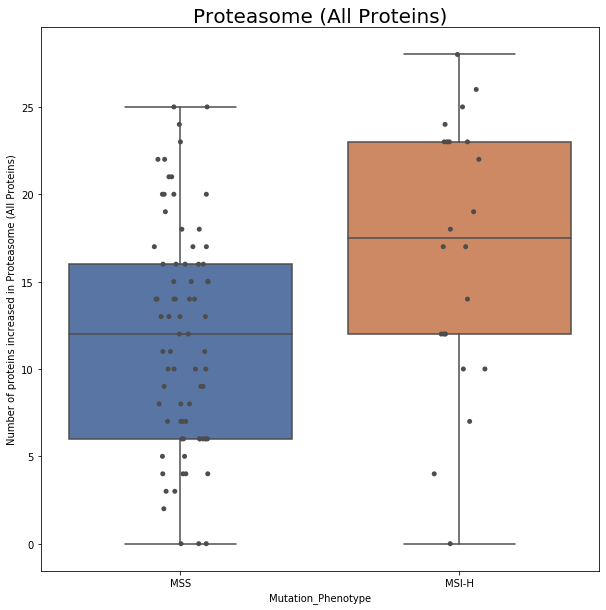

In [5]:
plot_complex_clinical('colon', 'Mutation_Phenotype', sig_proteasome, expression_change='increased', complex_name = 'Proteasome (All Proteins)', bin_size = 1, boxplot = True)

### Divide significant results into subunits of the proteasome

In [6]:
sub_20s = []
sub_19s = []
pa28 = []
for protein in sig_proteasome:
    if 'PSMA' in protein or 'PSMB' in protein: sub_20s.append(protein)
    elif 'PSMC' in protein or 'PSMD' in protein: sub_19s.append(protein)
    else: pa28.append(protein)  
sub_20s.sort()
sub_19s.sort()
pa28.sort()

## Plot expression levels
We can see here that most proteasomal proteins show increased expression in tumor samples

### 20S Proteasome

PSMA1: 1.289374891174728e-13
PSMA2: 8.123122524198827e-06
PSMA3: 3.042226326082461e-08
PSMA4: 2.3410017942941278e-07
PSMA5: 4.906971391818451e-09
PSMA6: 3.3553315400473855e-06
PSMA7: 2.4708591866353053e-19
PSMB5: 2.975078326021348e-07
PSMB6: 1.755575810797984e-12


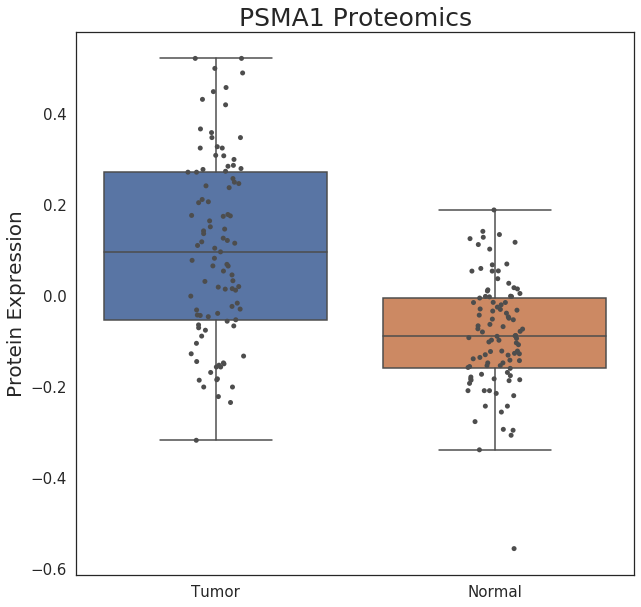

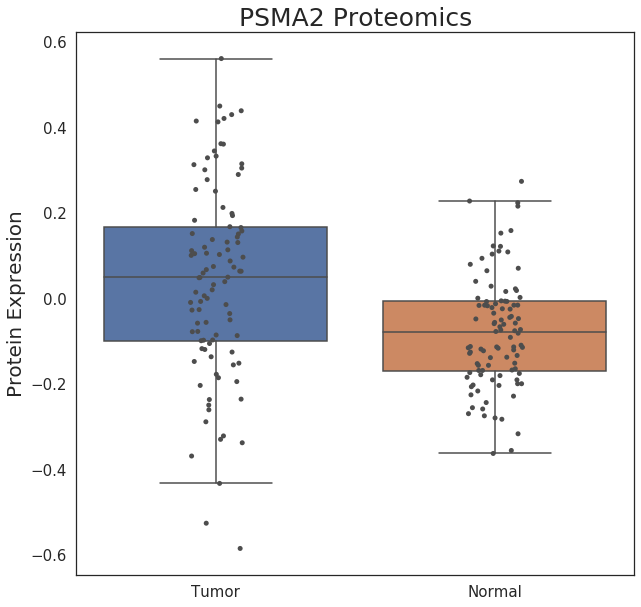

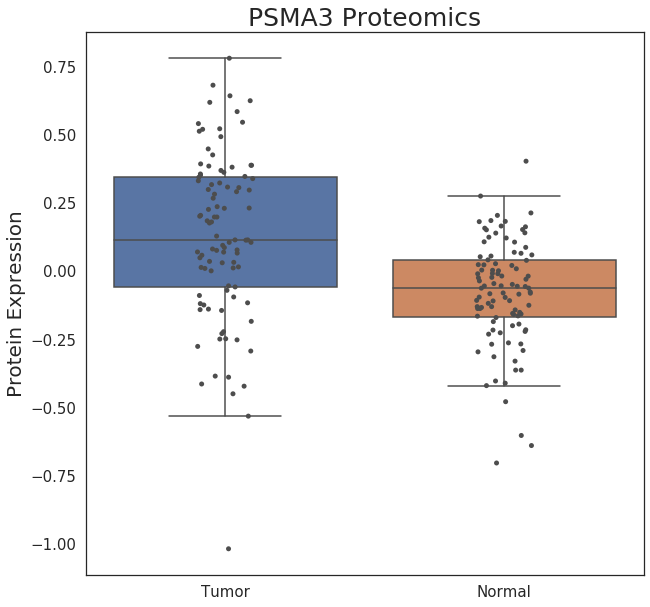

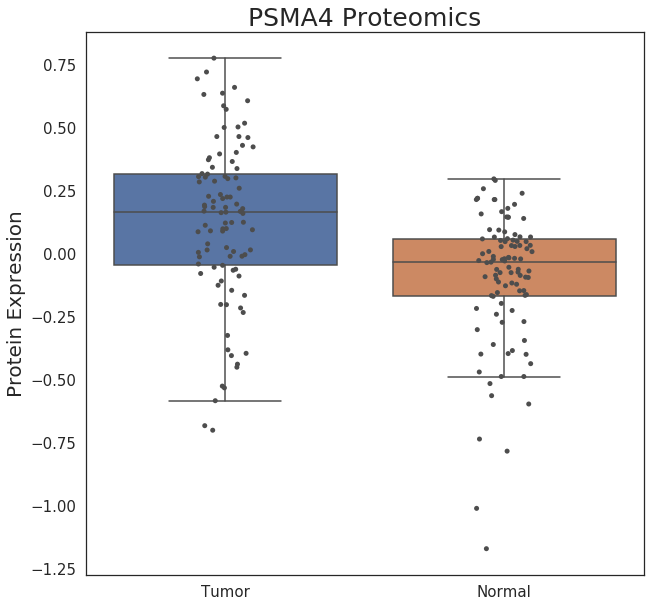

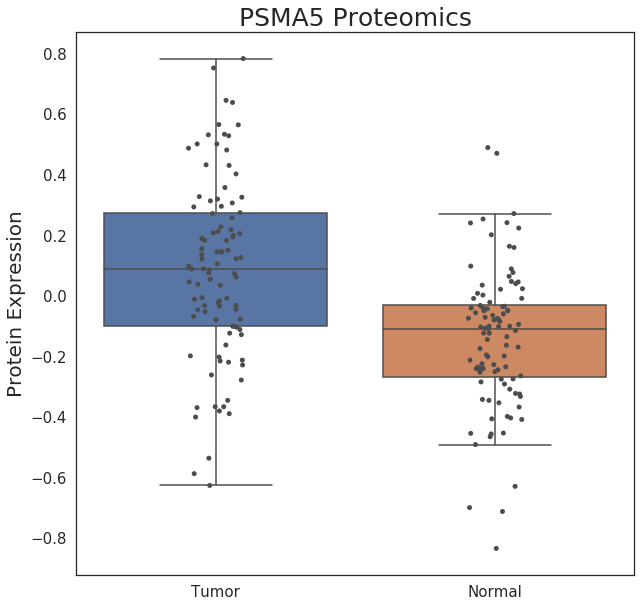

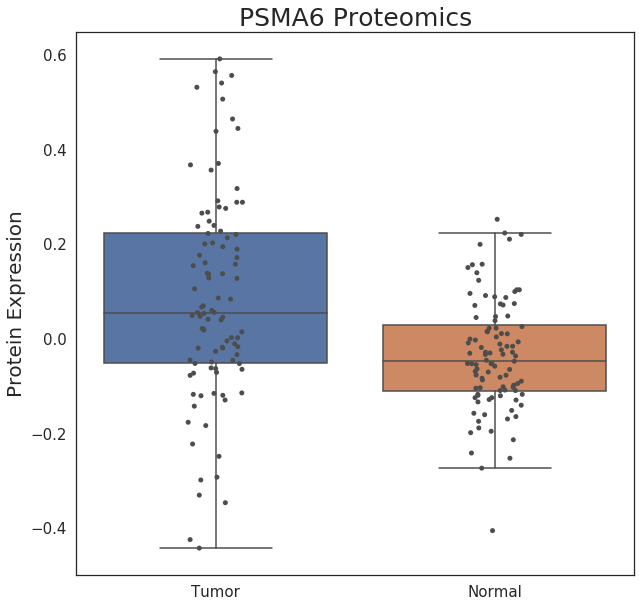

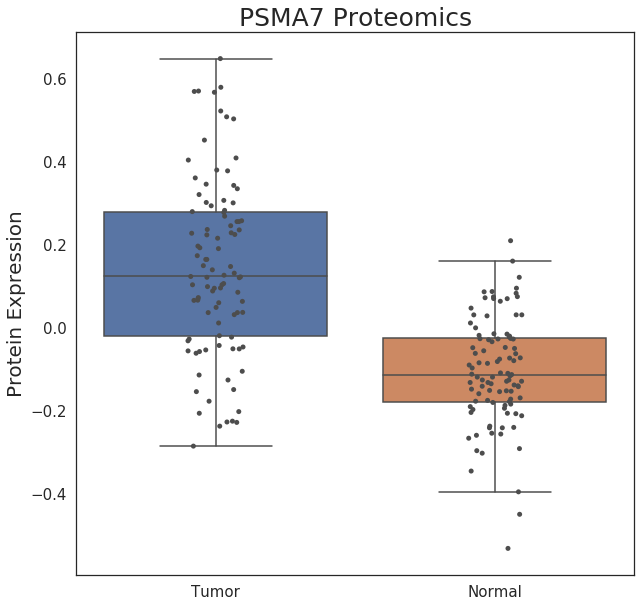

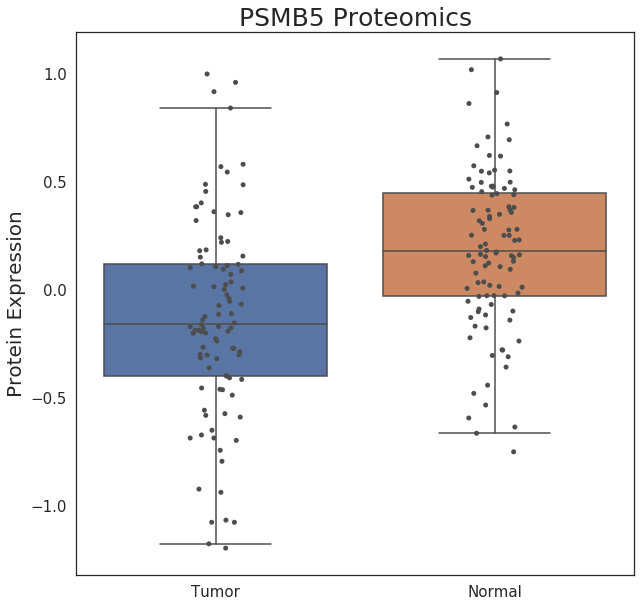

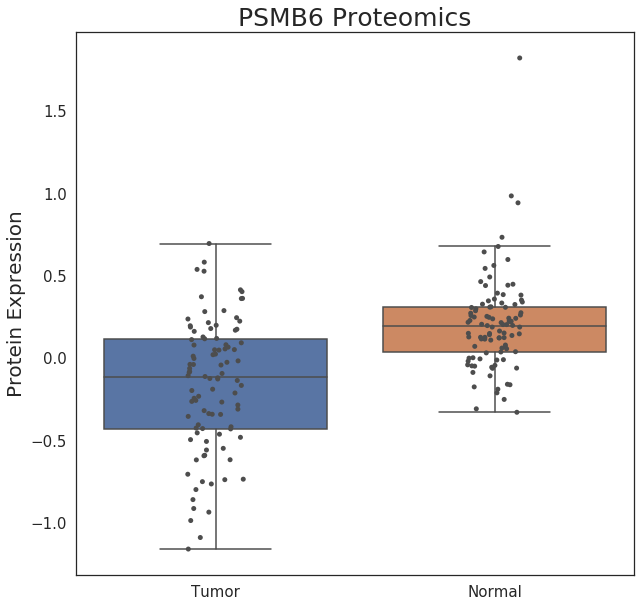

In [7]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

for protein in sub_20s:
    pval = ttest_proteomics(protein, cancer_type = 'colon')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'colon')

### 19S Regulatory Subunit (PA700)

PSMC1: 1.118883696866335e-26
PSMC2: 1.0337035106470325e-29
PSMC3: 1.877320016660007e-21
PSMC4: 3.3475882185542215e-20
PSMC5: 1.560873399648922e-23
PSMC6: 4.172528300682976e-13
PSMD1: 4.070687012970314e-22
PSMD10: 0.0009473615373918803
PSMD11: 3.02803828017868e-29
PSMD12: 3.27213029430174e-12
PSMD13: 1.1614466939496235e-19
PSMD14: 1.3371223229422526e-27
PSMD2: 1.2149983712893133e-33
PSMD3: 2.7907716575190155e-24
PSMD4: 1.1292683560447098e-10
PSMD5: 7.451353233572458e-08
PSMD6: 3.3597951082019133e-34
PSMD7: 1.4421029995488798e-12
PSMD8: 4.340639463831987e-18
PSMD9: 1.7299099983737895e-14


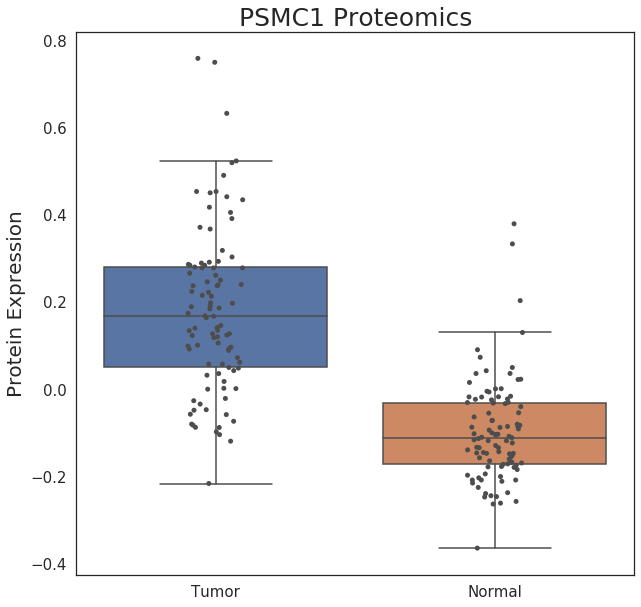

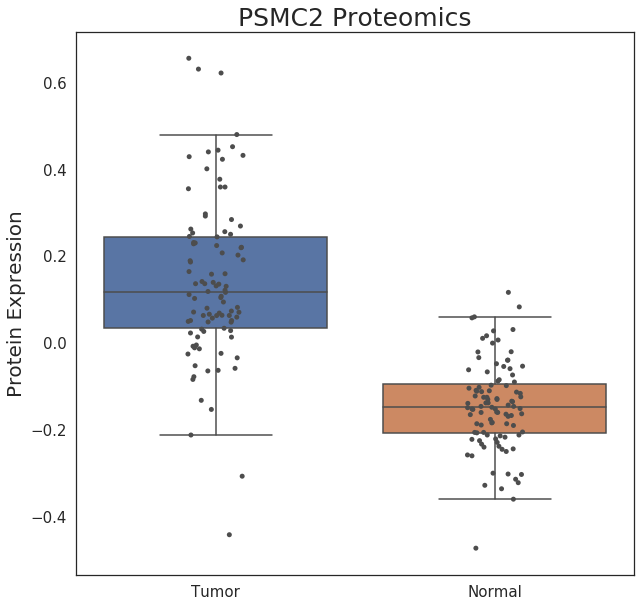

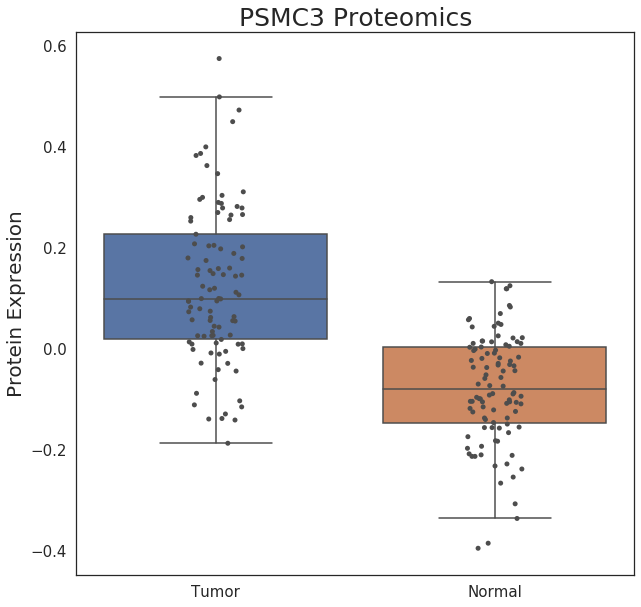

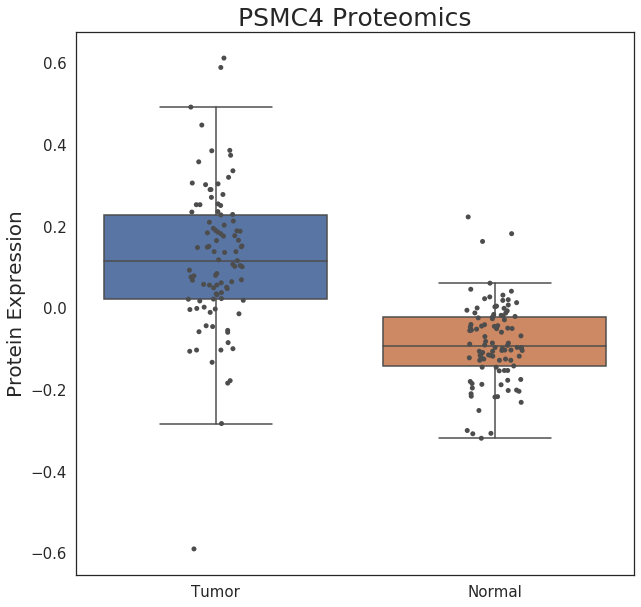

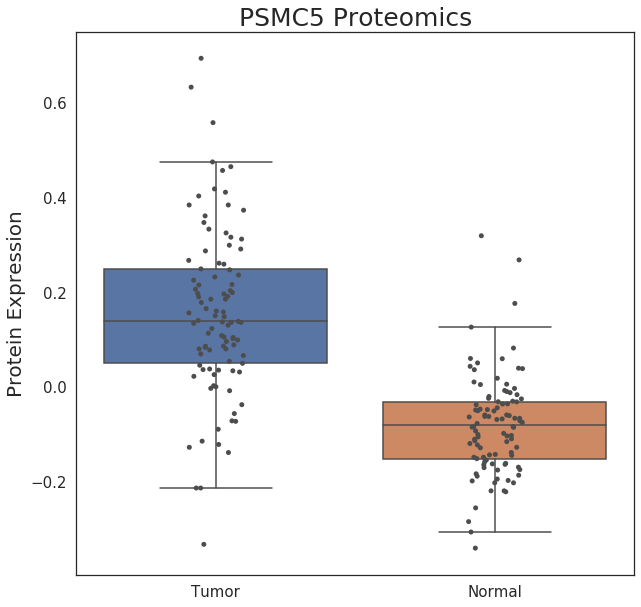

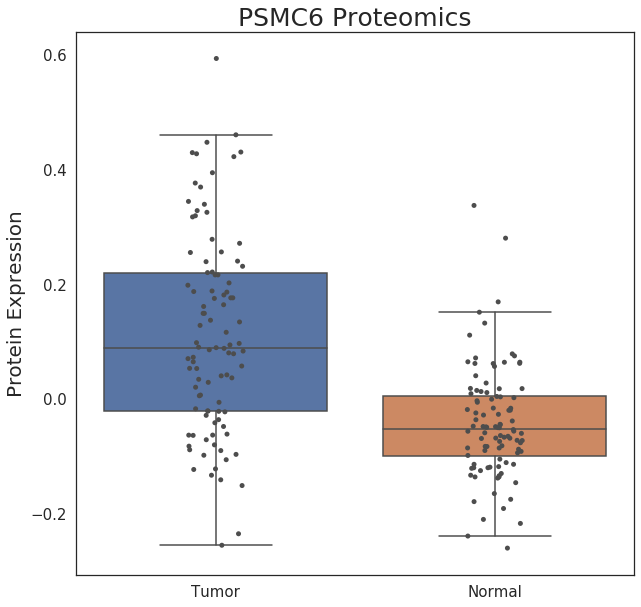

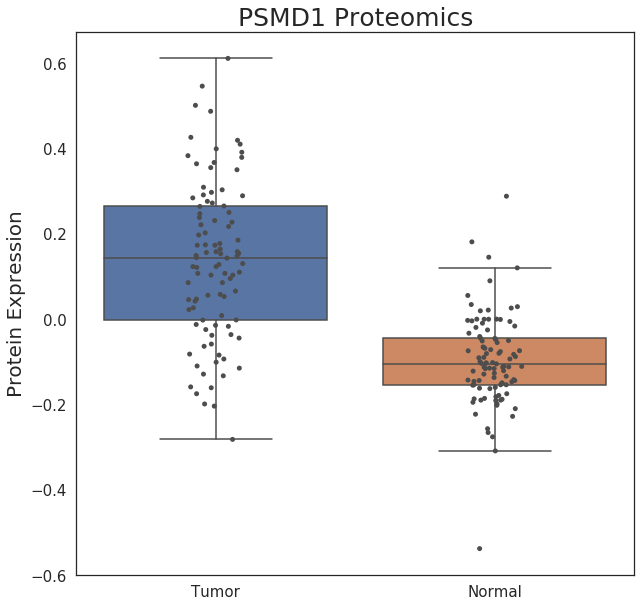

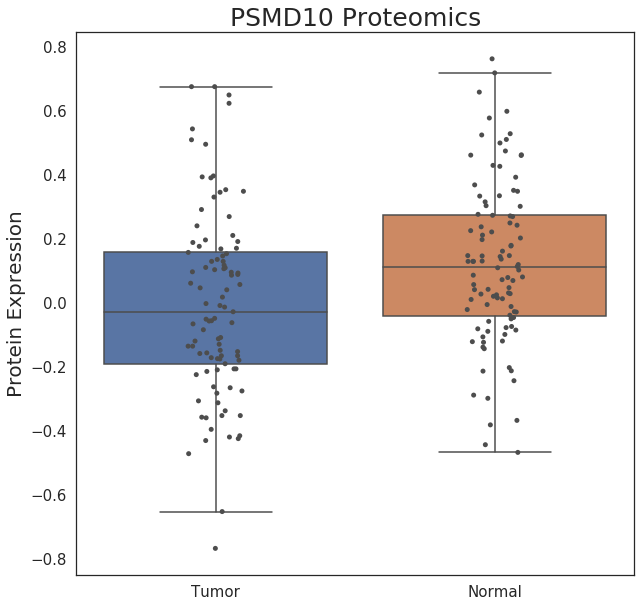

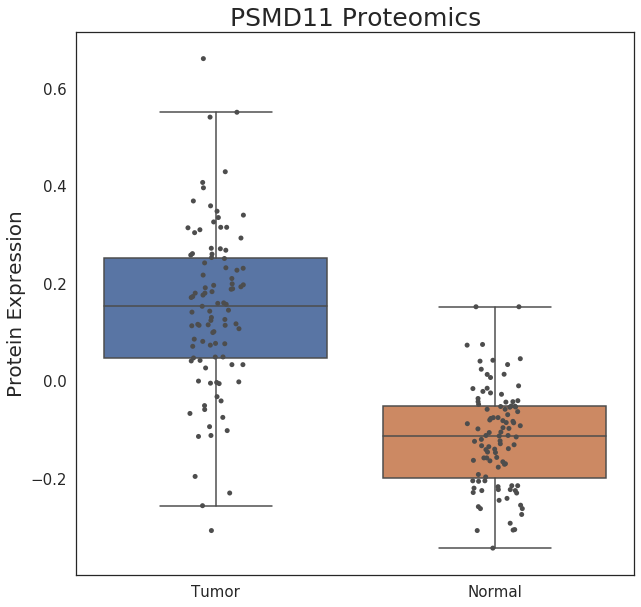

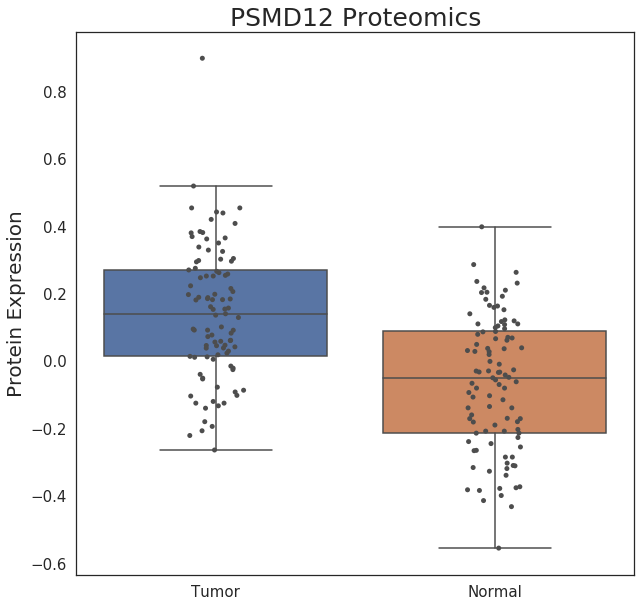

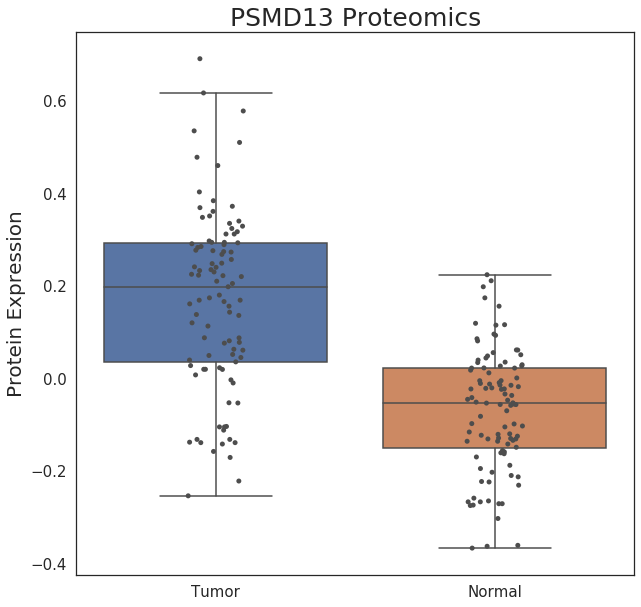

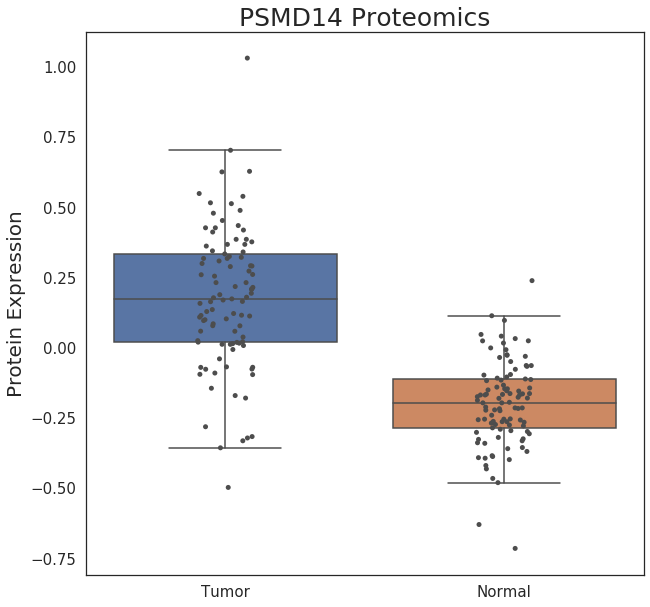

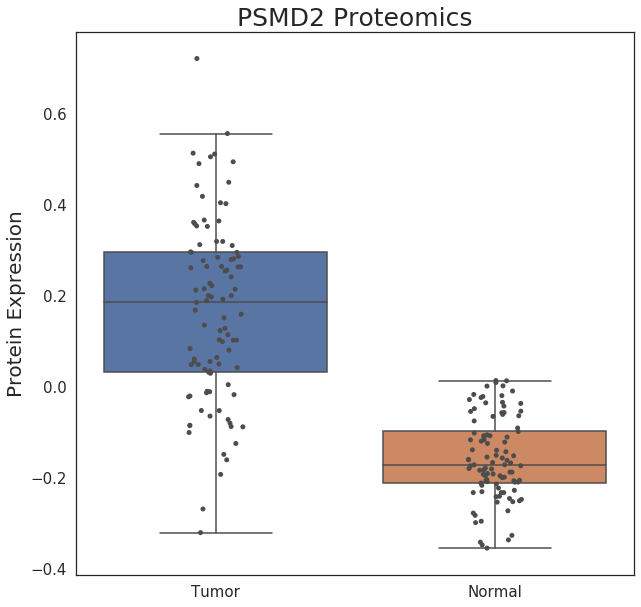

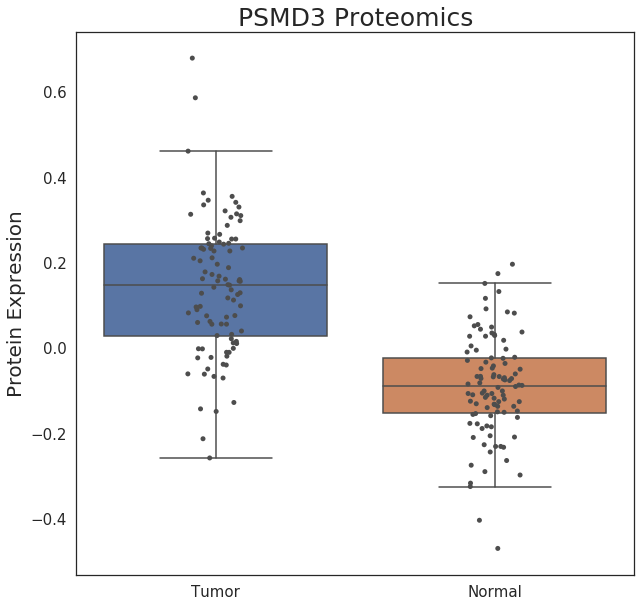

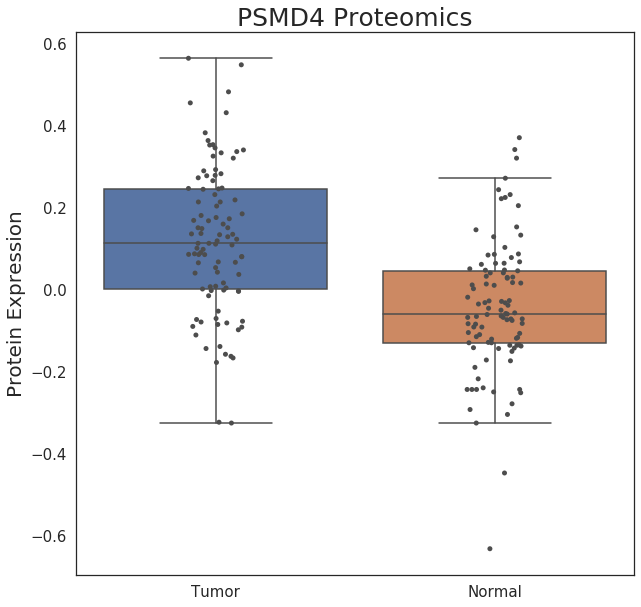

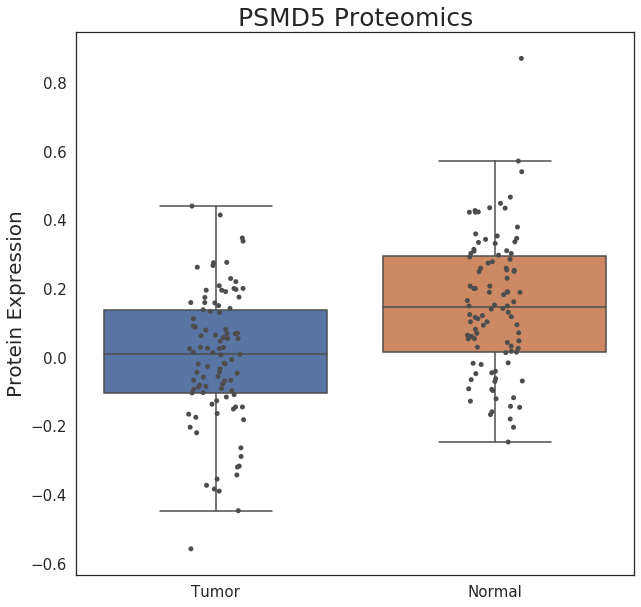

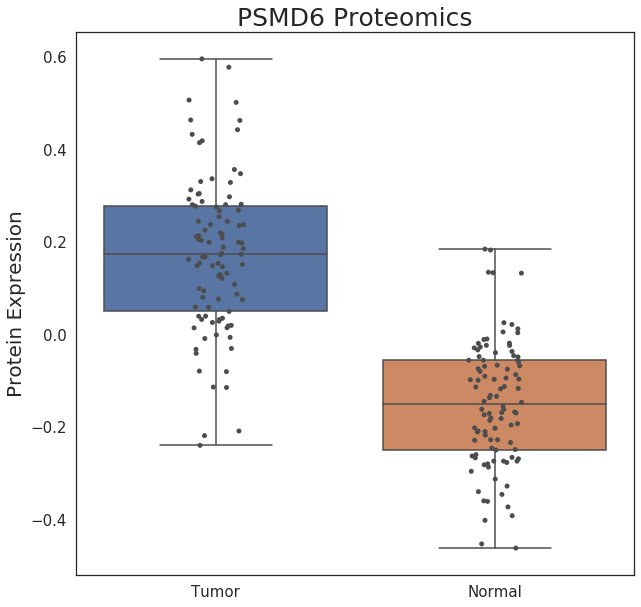

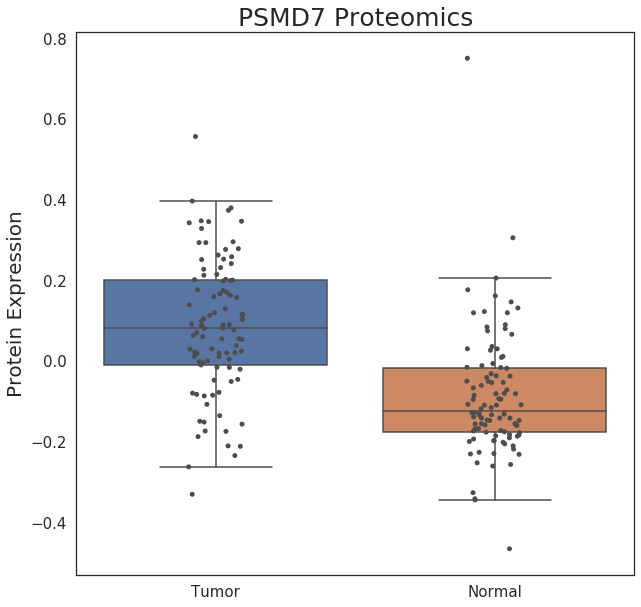

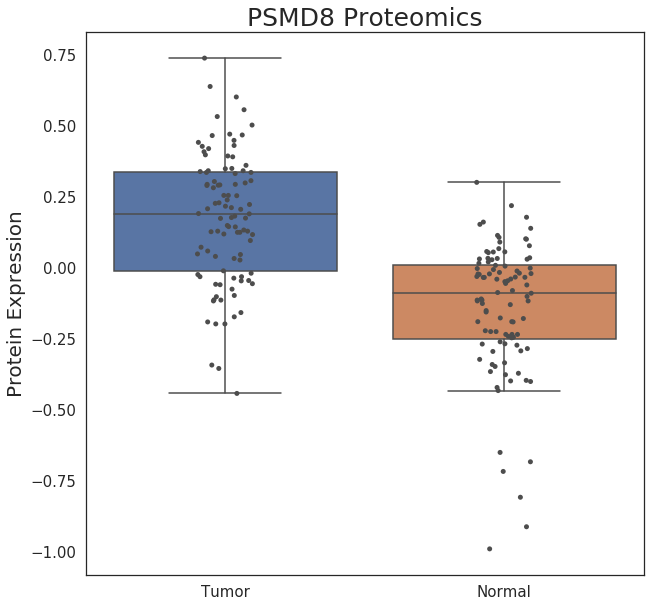

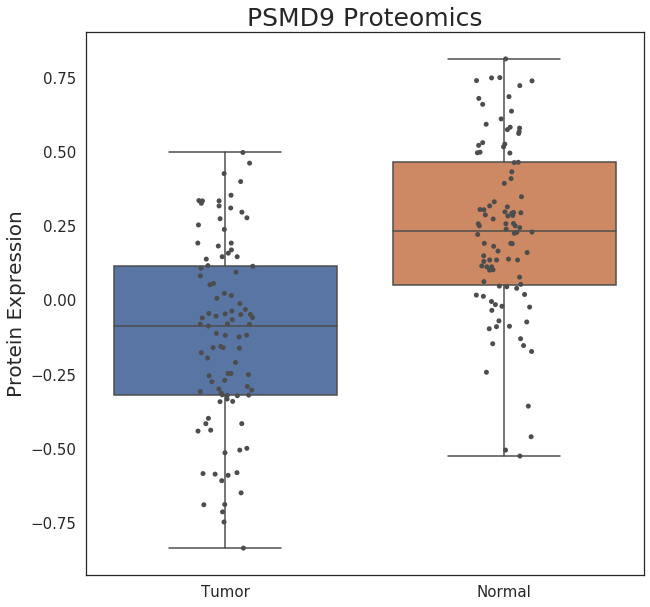

In [8]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

for protein in sub_19s:
    pval = ttest_proteomics(protein, cancer_type = 'colon')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'colon')

### PA28 (11S REG subunit)

PSME2: 7.516057191362746e-08
PSME3: 1.247709780409805e-46


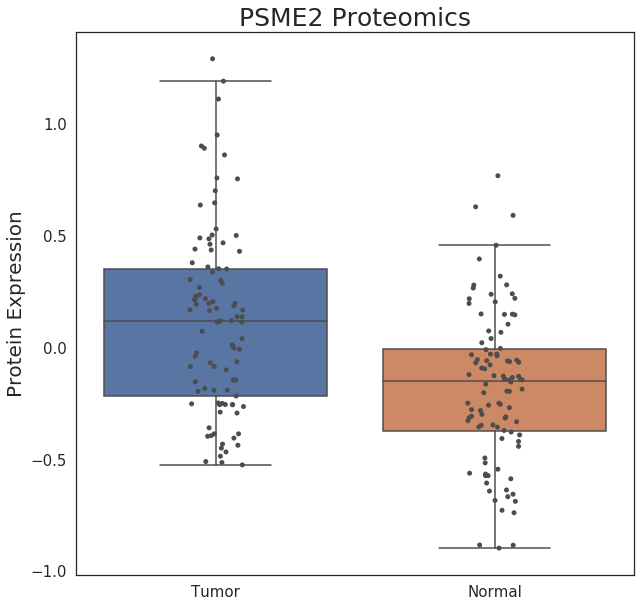

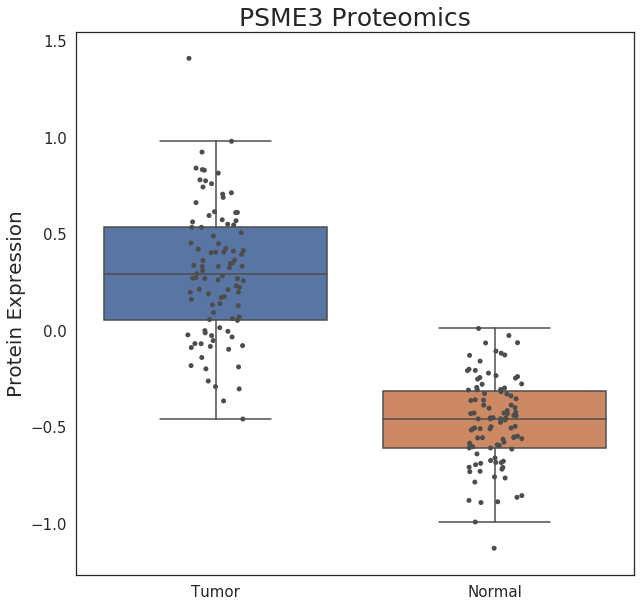

In [9]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

for protein in pa28:
    pval = ttest_proteomics(protein, cancer_type = 'colon')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'colon')